Dataset loaded successfully.
Initial dataset shape: (1718, 80)
Dataset shape after cleaning: (1718, 80)
Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


C:\Users\jaya karthick\AppData\Local\Temp\ipykernel_10712\2510288379.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Forward fill missing values
C:\Users\jaya karthick\AppData\Local\Temp\ipykernel_10712\2510288379.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='bfill')  # Backward fill for remaining missing values


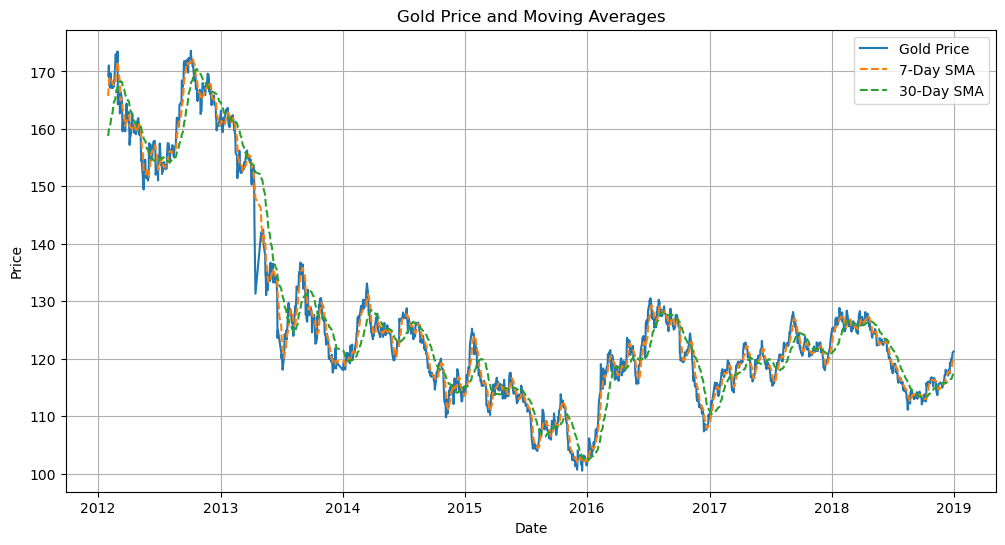

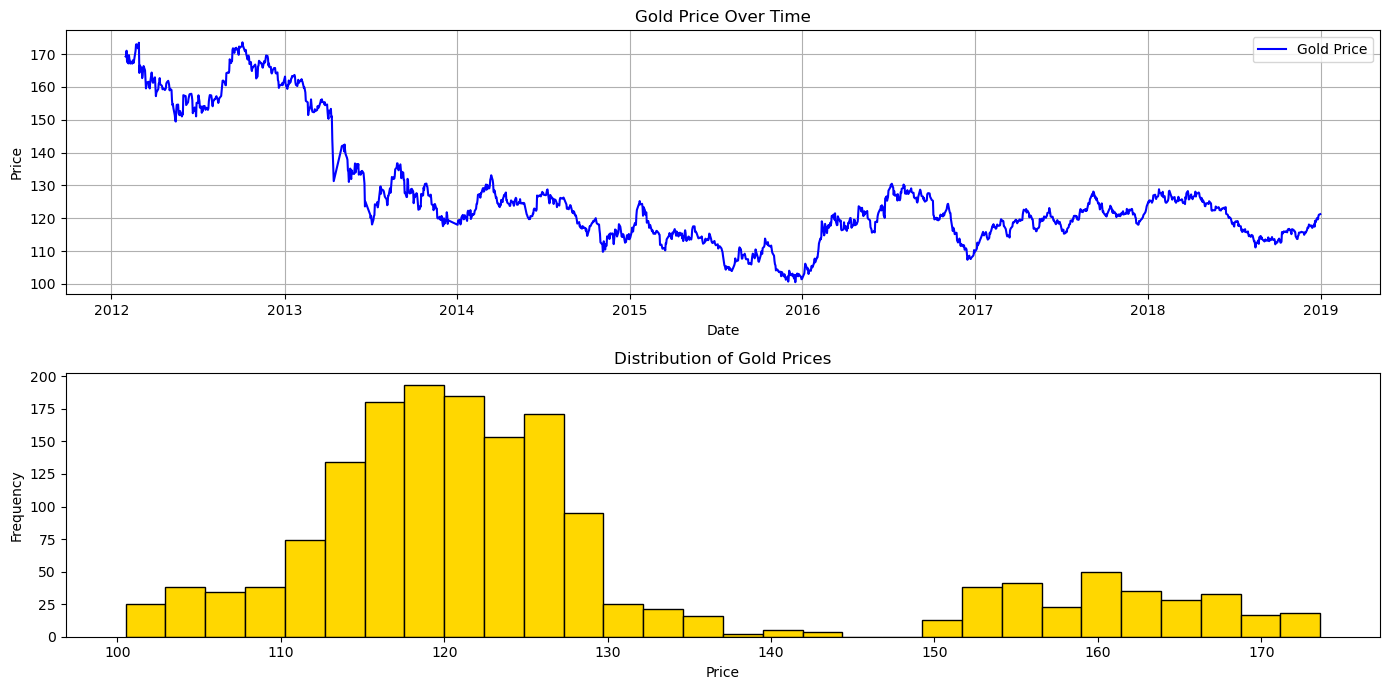

Processed dataset preview:
                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-31  169.770004  169.860001  167.720001  169.309998  169.309998   
2012-02-01  169.750000  170.179993  169.080002  169.559998  169.559998   
2012-02-02  169.960007  171.229996  169.679993  171.050003  171.050003   
2012-02-03  169.880005  170.139999  167.509995  167.639999  167.639999   
2012-02-06  166.960007  167.679993  166.610001  167.179993  167.179993   

              Volume     SP_open     SP_high      SP_low    SP_close  ...  \
Date                                                                  ...   
2012-01-31  11192500  132.020004  132.179993  130.679993  131.320007  ...   
2012-02-01   7734200  132.289993  133.139999  132.130005  132.470001  ...   
2012-02-02  11509600  132.729996  133.020004  132.210007  132.679993  ...   
2012-02-03  23355300  134.000000  134.619995  133.770004  134.539993

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
def load_data(filepath):
    try:
        data = pd.read_csv(filepath, parse_dates=True, index_col='Date')
        print("Dataset loaded successfully.")
        return data
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

# Data Cleaning
def clean_data(data):
    print("Initial dataset shape:", data.shape)
   
    # Drop duplicates
    data = data.drop_duplicates()

    # Handle missing values
    data = data.fillna(method='ffill')  # Forward fill missing values
    data = data.fillna(method='bfill')  # Backward fill for remaining missing values

    # Filter out any rows with invalid data
    data = data.dropna()

    print("Dataset shape after cleaning:", data.shape)
    return data

# Handle time series data
def preprocess_time_series(data):
    print("Index type:", type(data.index))
   
    # Ensure the index is datetime for time series processing
    if not isinstance(data.index, pd.DatetimeIndex):
        data.index = pd.to_datetime(data.index)

    # Sort the data by datetime (just in case it's not sorted)
    data = data.sort_index()

    return data

# Feature Engineering
def feature_engineering(data):
    data['SMA_7'] = data['Close'].rolling(window=7).mean()  # 7-day Simple Moving Average
    data['SMA_30'] = data['Close'].rolling(window=30).mean()  # 30-day Simple Moving Average

    # Add lag features for prediction
    data['Lag_1'] = data['Close'].shift(1)  # Previous day's price
    data['Lag_7'] = data['Close'].shift(7)  # Price a week ago

    # Drop NaN rows generated by lagging or rolling
    data = data.dropna()

    return data

# Data Visualization
def visualize_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Gold Price')
    plt.plot(data['SMA_7'], label='7-Day SMA', linestyle='--')
    plt.plot(data['SMA_30'], label='30-Day SMA', linestyle='--')
    plt.title('Gold Price and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

# Advanced Visualization
def visualize_time_series(data):
    plt.figure(figsize=(14, 7))

    # Line plot of the close price
    plt.subplot(2, 1, 1)
    plt.plot(data['Close'], label='Gold Price', color='blue')
    plt.title('Gold Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()

    # Histogram of price distribution
    plt.subplot(2, 1, 2)
    plt.hist(data['Close'], bins=30, color='gold', edgecolor='black')
    plt.title('Distribution of Gold Prices')
    plt.xlabel('Price')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Main function
def main():
    filepath = "C:\\Users\\jaya karthick\\Downloads\\archive (1) (1)\\FINAL_USO.csv"
    # Step 1: Load data
    data = load_data(filepath)
    if data is None:
        return

    # Step 2: Data Cleaning
    data = clean_data(data)

    # Step 3: Time Series Preprocessing
    data = preprocess_time_series(data)

    # Step 4: Feature Engineering
    data = feature_engineering(data)

    # Step 5: Data Visualization
    visualize_data(data)
    visualize_time_series(data)

    print("Processed dataset preview:\n", data.head())

if __name__ == "__main__":
    main()

      


Dataset loaded successfully.


C:\Users\jaya karthick\AppData\Local\Temp\ipykernel_10712\153460578.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill').fillna(method='bfill')


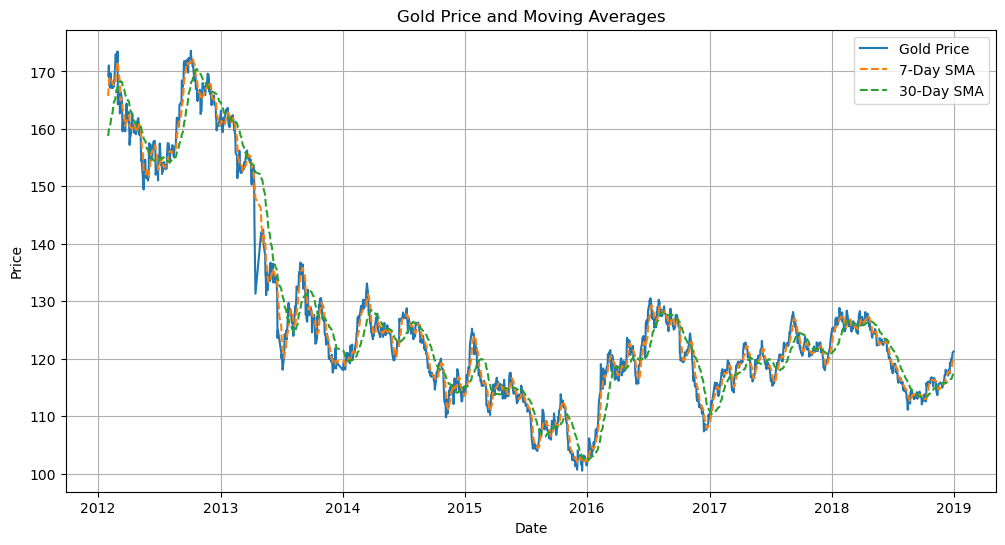

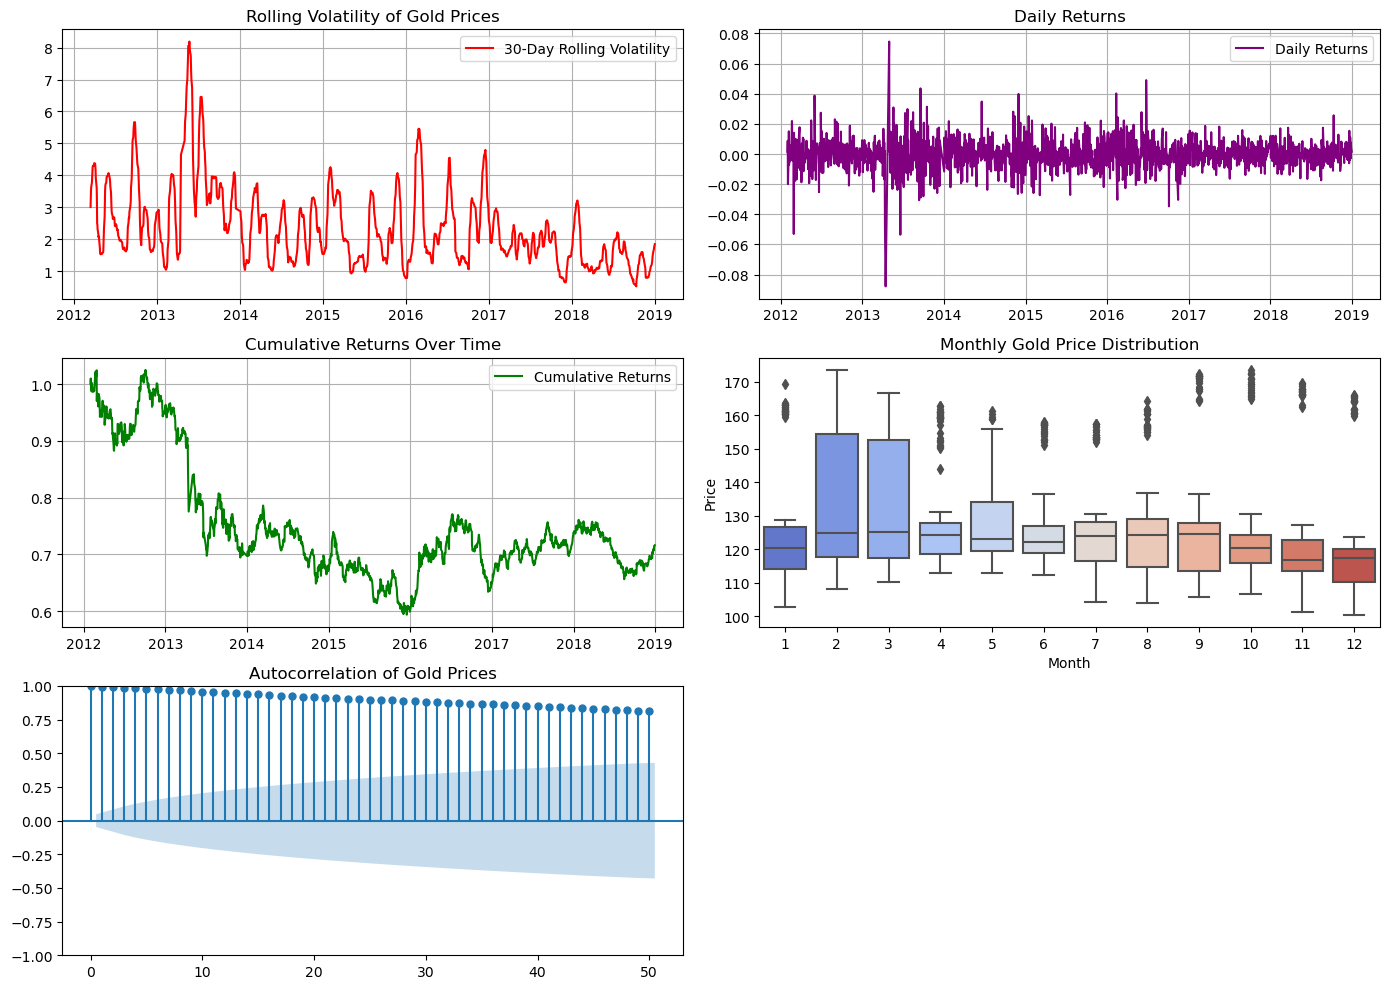

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load dataset
def load_data(filepath):
    try:
        data = pd.read_csv(filepath, parse_dates=True, index_col='Date')
        print("Dataset loaded successfully.")
        return data
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

# Data Cleaning
def clean_data(data):
    data = data.drop_duplicates()
    data = data.fillna(method='ffill').fillna(method='bfill')
    data = data.dropna()
    return data

# Handle time series data
def preprocess_time_series(data):
    if not isinstance(data.index, pd.DatetimeIndex):
        data.index = pd.to_datetime(data.index)
    data = data.sort_index()
    return data

# Feature Engineering
def feature_engineering(data):
    data['SMA_7'] = data['Close'].rolling(window=7).mean()
    data['SMA_30'] = data['Close'].rolling(window=30).mean()
    data['Lag_1'] = data['Close'].shift(1)
    data['Lag_7'] = data['Close'].shift(7)
    data = data.dropna()
    return data

# Data Visualization
def visualize_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Gold Price')
    plt.plot(data['SMA_7'], label='7-Day SMA', linestyle='--')
    plt.plot(data['SMA_30'], label='30-Day SMA', linestyle='--')
    plt.title('Gold Price and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

# Additional Plots
def additional_plots(data):
    plt.figure(figsize=(14, 10))
    
    # Rolling Volatility
    plt.subplot(3, 2, 1)
    data['Rolling_Volatility'] = data['Close'].rolling(window=30).std()
    plt.plot(data['Rolling_Volatility'], label='30-Day Rolling Volatility', color='red')
    plt.title('Rolling Volatility of Gold Prices')
    plt.legend()
    plt.grid()
    
    # Daily Returns
    plt.subplot(3, 2, 2)
    data['Daily_Returns'] = data['Close'].pct_change()
    plt.plot(data['Daily_Returns'], label='Daily Returns', color='purple')
    plt.title('Daily Returns')
    plt.legend()
    plt.grid()
    
    # Cumulative Returns
    plt.subplot(3, 2, 3)
    data['Cumulative_Returns'] = (1 + data['Daily_Returns']).cumprod()
    plt.plot(data['Cumulative_Returns'], label='Cumulative Returns', color='green')
    plt.title('Cumulative Returns Over Time')
    plt.legend()
    plt.grid()
    
    # Box Plot of Monthly Prices
    plt.subplot(3, 2, 4)
    data['Month'] = data.index.month
    sns.boxplot(x=data['Month'], y=data['Close'], palette='coolwarm')
    plt.title('Monthly Gold Price Distribution')
    plt.xlabel('Month')
    plt.ylabel('Price')
    
    # Autocorrelation Plot
    plt.subplot(3, 2, 5)
    sm.graphics.tsa.plot_acf(data['Close'].dropna(), lags=50, ax=plt.gca())
    plt.title('Autocorrelation of Gold Prices')
    
    plt.tight_layout()
    plt.show()

# Main function
def main():
    filepath = "C:\\Users\\jaya karthick\\Downloads\\archive (1) (1)\\FINAL_USO.csv"
    data = load_data(filepath)
    if data is None:
        return

    data = clean_data(data)
    data = preprocess_time_series(data)
    data = feature_engineering(data)
    visualize_data(data)
    additional_plots(data)

if __name__ == "__main__":
    main()
